<a href="https://colab.research.google.com/github/AmithReddyKasarla/AmithReddy_INFO5502_-Spring2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [390]:
### You code here:
#Installing pyforest as this is an automated library where all the primary libraries exists.
!pip install pyforest

In [391]:
import pyforest

In [392]:
#Reading train data into df_train
df_train = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv')

<IPython.core.display.Javascript object>

In [393]:
#Reading test data into df_test
df_test = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv')

<IPython.core.display.Javascript object>

In [394]:
#checking for null values
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [395]:
#checking for null values
df_test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [396]:
#checking for duplicate values
df_train.duplicated().unique()

array([False])

In [397]:
#checking for duplicate values
df_test.duplicated().unique()

array([False])

In [398]:
#Describing the train data to know the stats of the data
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [399]:
#Describing the test data to know the stats of the data
df_test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,2.512266,0.014019,0.691589,1.437500,20.769182,24.065832,62.804907,13.128763
std,1.114104,0.117602,0.461972,0.625445,6.916677,7.650085,18.360263,7.971457
min,1.000000,0.000000,0.000000,1.000000,4.920000,6.060000,8.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,15.580000,19.695000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,64.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,25.420000,30.305000,77.000000,16.997900
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,50.002100


Text(0.5, 1.0, 'HeatMap for training data')

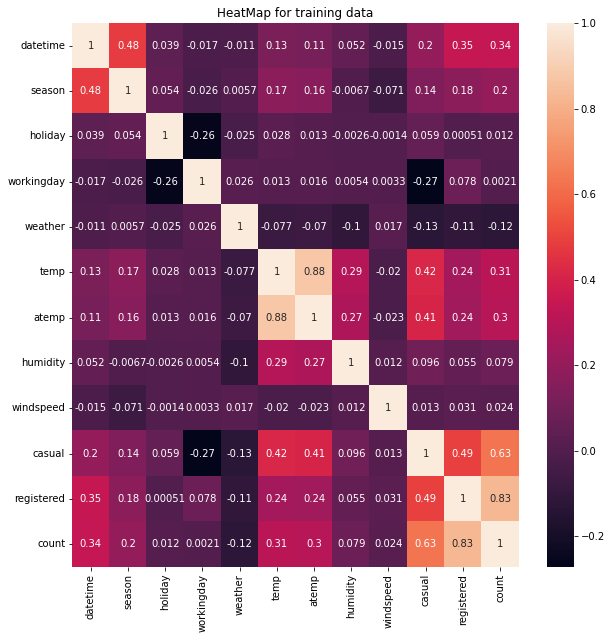

In [400]:
import seaborn as sns
from importlib import reload
data = df_train.apply(lambda x:x.factorize()[0]).corr()
plt.figure(figsize=(10,10))
sns.heatmap(data, annot = True)
plt.title("HeatMap for training data")

Text(0.5, 1.0, 'HeatMap for testing data')

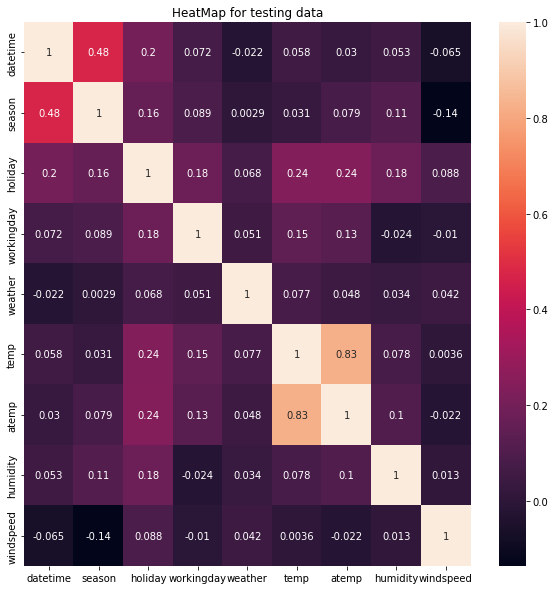

In [401]:
data = df_test.apply(lambda x:x.factorize()[0]).corr()
plt.figure(figsize=(10,10))
sns.heatmap(data, annot = True)
plt.title("HeatMap for testing data")

In [402]:
#importing datetime 
from datetime import datetime

In [403]:
#Creating a new feature in df_train data call hour and mapping the datetime with the help of lambda
df_train['hour']=df_train['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time().hour)
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109,19
9170,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122,20
9171,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106,21
9172,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89,22


In [404]:
#Creating a new feature in df_test data call hour and mapping the datetime with the help of lambda
df_test['hour'] = df_test['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time().hour)
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,0
1,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1
2,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,2
3,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,3
4,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,4
...,...,...,...,...,...,...,...,...,...,...
1707,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,19
1708,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,20
1709,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,21
1710,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,22


In [405]:
#Splitting the data and assigning all the independent features to x
x=df_train.iloc[:,[1,2,3,4,5,6,7,8,12]]
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,1,0,0,1,9.84,14.395,81,0.0000,0
1,1,0,0,1,9.02,13.635,80,0.0000,1
2,1,0,0,1,9.02,13.635,80,0.0000,2
3,1,0,0,1,9.84,14.395,75,0.0000,3
4,1,0,0,1,9.84,14.395,75,0.0000,4
...,...,...,...,...,...,...,...,...,...
9169,4,0,0,1,14.76,17.425,93,8.9981,19
9170,4,0,0,2,15.58,19.695,82,0.0000,20
9171,4,0,0,2,14.76,18.940,93,0.0000,21
9172,4,0,0,2,16.40,20.455,82,12.9980,22


In [406]:
#Splitting the data and assigning all the dependent features to y
y=df_train.iloc[:,9]
y

0        3
1        8
2        5
3        3
4        0
        ..
9169    10
9170    14
9171    14
9172     6
9173     4
Name: casual, Length: 9174, dtype: int64

In [407]:
#Now we are further splitting the data into train and test split for model building in the ratio of 80:20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

<IPython.core.display.Javascript object>

In [408]:
#This is the First model called RandomForestRegressor and assigning it to mod
mod = RandomForestRegressor(random_state=25,max_depth = 7, oob_score = True)

<IPython.core.display.Javascript object>

In [409]:
#Now we are checking te cross validation score for the model with x_train and y_train
from sklearn.model_selection import cross_val_score
score = cross_val_score(mod, x_train, y_train, cv = 4)
score

array([0.83449255, 0.82443837, 0.83131878, 0.82704512])

In [410]:
#Here we are just fitting the the train data to the mod
mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, oob_score=True, random_state=25)

In [411]:
#Predicting the test values and assigning it to pr
pr = mod.predict(x_test)
pr

array([ 1.84776614, 60.42866568, 37.71959229, ..., 23.62996846,
       11.42045455, 12.10955987])

In [412]:
mod.score(x_test,y_test)

0.7983534610901579

In [413]:
#To check the metrics of the model we use mean_squared_error as this is a Regressor problem
from sklearn.metrics import mean_squared_error
import math
mse  = mean_squared_error(pr,y_test)
rmse = math.sqrt(mse)
rmse

21.867037024215158

In [414]:
#This is the Second model called LinearRegressor and assigning it to mod2
mod2 = LinearRegression()

<IPython.core.display.Javascript object>

In [415]:
#Now we are checking te cross validation score for the model with x_train and y_train
score = cross_val_score(mod2, x_train, y_train, cv = 4)
score

array([0.48884496, 0.46941299, 0.47812069, 0.48575867])

In [416]:
#Here we are just fitting the the train data to the mod2
mod2.fit(x_train,y_train)

LinearRegression()

In [417]:
#Predicting the test values and assigning it to pr2
pr2 = mod2.predict(x_test)
pr2

array([-16.22686292,  70.59965508,  44.75446434, ...,  61.18290216,
        25.18996043,  30.77233152])

In [418]:
#To check the metrics of the model we use mean_squared_error as this is a Regressor problem
mse2  = mean_squared_error(pr2,y_test)
rmse2 = math.sqrt(mse2)
rmse2

35.93365259492665

In [419]:
mod2.score(x_test,y_test)

0.4554802693019141

In [420]:
#This is the Third model called DecisionTreeRegressor and assigning it to mod3
from sklearn.tree import DecisionTreeRegressor
mod3 = DecisionTreeRegressor()
#Here we are just fitting the the train data to the mod
mod3.fit(x_train,y_train)
#Predicting the test values and assigning it to pr3
pr3 = mod3.predict(x_test)
pr3

array([ 2. , 81. , 37.5, ..., 39. , 22. ,  9. ])

In [421]:
#Now we are checking te cross validation score for the model with x_train and y_train
score = cross_val_score(mod3, x_train, y_train, cv = 4)
score

array([0.73397572, 0.7266389 , 0.73697692, 0.7458359 ])

In [422]:
#To check the metrics of the model we use mean_squared_error as this is a Regressor problem
mse3  = mean_squared_error(pr3,y_test)
rmse3 = math.sqrt(mse3)
rmse3

26.647819179624676

In [423]:
mod3.score(x_test,y_test)

0.7005431602208536

In [424]:
#Above we build 3 model and found that only 2 - RandomForestRegressor and DecisionTreeRegressor are having good accuracy.
#So we are taking these two into consideration and predicting the final output
mod.fit(df_train.iloc[:,[1,2,3,4,5,6,7,8,12]],df_train.iloc[:,9])
predval = mod.predict(df_test.iloc[:,1:10])
predval

array([ 4.89707236,  4.97102084,  4.7882792 , ..., 11.28170482,
       11.36321743, 10.8123926 ])

In [425]:
df_test['casual']=np.round(predval,1)
df_test['casual']

<IPython.core.display.Javascript object>

0        4.9
1        5.0
2        4.8
3        2.6
4        1.6
        ... 
1707    24.7
1708    11.9
1709    11.3
1710    11.4
1711    10.8
Name: casual, Length: 1712, dtype: float64

In [426]:
mod3.fit(df_train.iloc[:,[1,2,3,4,5,6,7,8,12]], df_train.iloc[:,10])
predval2 = mod3.predict(df_test.iloc[:,1:10])
predval2

array([ 42.,  42.,  11., ..., 193., 175.,  48.])

In [427]:
df_test['registered']=np.round(predval2,1)
df_test['registered']

<IPython.core.display.Javascript object>

0        42.0
1        42.0
2        11.0
3        17.0
4         3.0
        ...  
1707    212.0
1708    207.0
1709    193.0
1710    175.0
1711     48.0
Name: registered, Length: 1712, dtype: float64

In [428]:
#Here after predicting the casual and registeres we ae adding them and storing them into count 
df_test['count']=df_test['casual']+df_test['registered']

In [429]:
df_test['count']

0        46.9
1        47.0
2        15.8
3        19.6
4         4.6
        ...  
1707    236.7
1708    218.9
1709    204.3
1710    186.4
1711     58.8
Name: count, Length: 1712, dtype: float64

In [430]:
df_test[['datetime','count']].to_csv('predictions.csv',header=['datetime','count'],index = False) 

In [431]:
#Diplaying the final date after storing the predicted values
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,casual,registered,count
0,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,0,4.9,42.0,46.9
1,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,5.0,42.0,47.0
2,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,2,4.8,11.0,15.8
3,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,3,2.6,17.0,19.6
4,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,4,1.6,3.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,19,24.7,212.0,236.7
1708,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,20,11.9,207.0,218.9
1709,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,21,11.3,193.0,204.3
1710,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,22,11.4,175.0,186.4
